In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")


In [4]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [5]:
df.shape # shape of data how many row`s and columns in you data

(37249, 2)

In [6]:
df.isnull().sum() # How many missing values in your dataset

clean_comment    100
category           0
dtype: int64

In [7]:
df.dtypes # what is your data types in your data set

clean_comment    object
category          int64
dtype: object

In [8]:
df.sample()['clean_comment'].values

array(['thx improper demonitization '], dtype=object)

In [10]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [17]:
df[df['clean_comment'].isna()]['category'].value_counts() # how many rowa missing which is category only 0 = neutral comment category comment missing values founds

category
0    100
Name: count, dtype: int64

In [18]:
df['category'].value_counts()

category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(37149, 2)

In [22]:
df.duplicated().sum()

350

In [23]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [24]:
df['clean_comment']=df['clean_comment'].str.lower().str.strip()

In [28]:
df.duplicated().sum()

541

In [63]:
df.drop_duplicates(subset=['clean_comment', 'category'], inplace=True, keep='first')

In [64]:
df.duplicated().sum()

0

In [66]:
duplicate_rows=df[df.duplicated()]

In [67]:
duplicate_rows['category'].value_counts()

Series([], Name: count, dtype: int64)

In [68]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].sum()

clean_comment    0
category         0
dtype: object

In [69]:

# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()
     

0

In [70]:

# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

comments_with_url=df['clean_comment'].str.contains(url_pattern, regex=True)

In [71]:
df[comments_with_url]

,clean_comment,category


In [72]:
comment_with_newline=df[df['clean_comment'].str.contains('\n')]

In [73]:
comment_with_newline

,clean_comment,category


In [97]:
df = df[df['clean_comment'].str.len() > 0]  # Empty comments drop karo

In [74]:
df['clean_comment']=df['clean_comment'].str.replace('\n', ' ', regex=True)

In [98]:
df[df['clean_comment'].str.contains('\n')]

,clean_comment,category,word_count


In [113]:
# EDA

import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

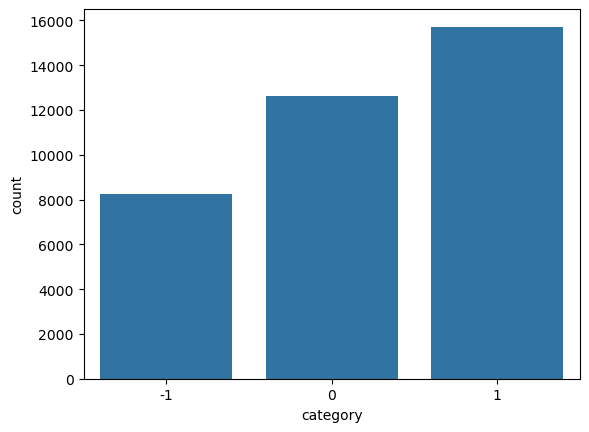

In [114]:
sns.countplot(data=df , x='category')

In [115]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.95
 0    34.56
-1    22.49
Name: proportion, dtype: float64

In [116]:
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))

In [117]:
df

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112
...,...,...,...
37244,jesus,0,1
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19
37246,downvote karna tha par upvote hogaya,0,6
37247,haha nice,1,2


In [118]:
df['word_count'].describe()

count    36605.000000
mean        29.806666
std         56.901788
min          1.000000
25%          7.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

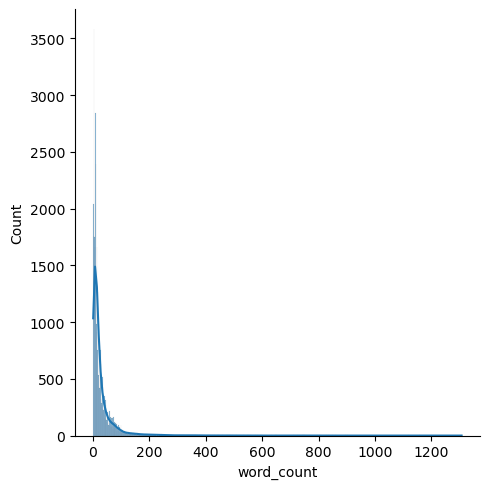

In [119]:
sns.displot(df['word_count'], kde=True)

In [120]:
# Empty comments check
print("Empty comments count:", len(df[df['clean_comment'].str.len() == 0]))

Empty comments count: 0


In [ ]:
plt.figure(figsize=(12,8))

sns.kdeplot

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>